<a href="https://colab.research.google.com/github/NihilisticMotif/EtCetera_at_an_Exhibition/blob/main/CV_Documentation_v01/MachineLearning/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###To Do Now 

###[_LogisticRegression.ipynb]
1. Read this links
* https://data.library.virginia.edu/understanding-deviance-residuals/
* https://towardsdatascience.com/saturated-models-deviance-and-the-derivation-of-sum-of-squares-ee6fa040f52
* https://youtu.be/JC56jS2gVUE
2. Explain and implement Null deviance and residual deviance
3. Plotting Graph

###[_LinearRegression.ipynb]
1. Plotting Graph

###[_GaussianDistribution.ipynb]
1. Explain and implement z score
2. Check and improve readability of this document

###[_NeuralNetwork.ipynb]
1. Implement this: https://youtu.be/FBpPjjhJGhk
1. Explain briefly what is neural network and how it works
2. Explain and implement different type of Activation Functions (https://towardsdatascience.com/everything-you-need-to-know-about-activation-functions-in-deep-learning-models-84ba9f82c253)
3. Explain, compare and implement backpropagation and gradient descent
5. Implement 3 neural network that is based on MNIST dataset
 1. the first one have 2 hidden layer
 2. the second one have no hidden layer
 3. the third one is based on ML library
6. compare the accuracy of every implemented ML code.

#Get Data

In [13]:
from google.colab import drive

import math
import pandas as pd
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
import statsmodels.api as sm  
# reference: https://www.statology.org/aic-in-python/

In [14]:
drive.mount('/content/drive')

path='/content/drive/MyDrive/Data-Science-Documentation/DataSet/IRIS.csv'
'''
Source of the data set: https://www.kaggle.com/datasets/arshid/iris-flower-dataset
'''
df = pd.read_csv(path)
df.head()
#df.astype(float)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [16]:
for i in df['species'].value_counts().index.tolist():
  df[i]=np.zeros(df.shape[0])
  # reference: https://stackoverflow.com/questions/35523635/extract-values-in-pandas-value-counts
  # reference: https://www.statology.org/add-numpy-array-to-pandas-dataframe/

In [17]:
for i in range(df.shape[0]):
  for j in range(3):
    if df.iloc[i,4]==df['species'].value_counts().index.tolist()[j]:
      df.iloc[i,j-3]=1

In [18]:
df[df['species']==df['species'].value_counts().index.tolist()[2]].head(5)

,sepal_length,sepal_width,petal_length,petal_width,species,Iris-setosa,Iris-versicolor,Iris-virginica
100,6.3,3.3,6.0,2.5,Iris-virginica,0.0,0.0,1.0
101,5.8,2.7,5.1,1.9,Iris-virginica,0.0,0.0,1.0
102,7.1,3.0,5.9,2.1,Iris-virginica,0.0,0.0,1.0
103,6.3,2.9,5.6,1.8,Iris-virginica,0.0,0.0,1.0
104,6.5,3.0,5.8,2.2,Iris-virginica,0.0,0.0,1.0


In [19]:
df=df.drop('species', axis=1)

In [20]:
df.iloc[:,[-3,-2,-1]] 
# reference: https://sparkbyexamples.com/pandas/pandas-select-multiple-columns-in-dataframe/

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
145,0.0,0.0,1.0
146,0.0,0.0,1.0
147,0.0,0.0,1.0
148,0.0,0.0,1.0


**Why we separate training and testing data**
* training data is used for improve weight and bias ($\vec{w}$ and $\vec{b}$) of the machine learning model.
* testing data is used for evaluate the machine learning model. In addition it check if the model is not over fitting.

In [21]:
# Separate training and evaluating data in order to evaluate how well the algorithm predict data out side its data set.

def SeparateData(data,Ratio,nameY):

  DataRatio = int(data.shape[0]*Ratio)
  Data=data.sample(frac = 1)

  TrainX=Data.iloc[:DataRatio,[0,1,2,3]]
  TrainY=Data.iloc[:DataRatio,[-3,-2,-1]]
  TesttX=Data.iloc[DataRatio:,[0,1,2,3]]
  TesttY=Data.iloc[DataRatio:,[-3,-2,-1]]

  return [TrainX,TrainY,TesttX,TesttY]

# Data A
Data=SeparateData(df,0.75,df.columns[-1])
Trai_X=Data[0]
Trai_Y=Data[1]
Test_X=Data[2]
Test_Y=Data[3]

In [22]:
Trai_X.shape

(112, 4)

In [23]:
print(Trai_X.iloc[82,:])
print(Trai_Y.iloc[82])

sepal_length    6.3
sepal_width     2.5
petal_length    5.0
petal_width     1.9
Name: 146, dtype: float64
Iris-setosa        0.0
Iris-versicolor    0.0
Iris-virginica     1.0
Name: 146, dtype: float64


In [24]:
df[(df['sepal_length']==5.5) & (df['sepal_width']==4.2)]

,sepal_length,sepal_width,petal_length,petal_width,Iris-setosa,Iris-versicolor,Iris-virginica
33,5.5,4.2,1.4,0.2,1.0,0.0,0.0


#(1.) Logistic Regression

###Introduction of Logistic Regression

**What is Logistic Regression?**

Logistic regression is a supervised learning algorithm used to predict a dependent categorical target variable. In essence, if you have a large set of data that you want to categorize, logistic regression may be able to help. (https://www.mastersindatascience.org/learning/machine-learning-algorithms/logistic-regression/)

**Type of Logistic Regression**
1. Binary logistic regression
* This algorithm compute the input $X$ into output $y$, where $y$ only means true or false.
* $y\in \{0,1\}$
* e.g. Is this picture has a dog? etc.
2. Multinomial logistic regression
* This algorithm categorize things into 3 or more types. It works by compute Binary logistic regression on each type in order to find out if something is likely to be categorized in one type than other.
* e.g.
* Classifying texts into what language they come from.
* Predicting whether a student will go to college, trade school or into the workforce.
* Does your cat prefer wet food, dry food or human food?
* etc.
3. Ordinal logistic regression
* Ordinal logistic regression is also a model where there are multiple classes that an item can be classified as; however, in this case an ordering of classes is required. Classes do not need to be proportionate. The distance between each class can vary.
* e.g. Movies Rate etc.

reference: https://www.mastersindatascience.org/learning/machine-learning-algorithms/logistic-regression/

**Why we do not use linear regression in this case?**

Linear Regression can only be used for predicting the relationship between continuous variable.

This algorithm is not good for classification task because
* In this case, output data can be classify into 2 values $\{0,1\}$, the linear regression algorithmn do not predict output data accuratly at all.
* In theory, $h(x)$ should be $0\leq h(x)\leq 1$ for boolean classification problem.

**What I will do in this tutorial?**
* I will demonstrate how to use Logistic Regression to predict the relationship between continue $x$ variable and discrete $y$ variable.

1. Implementing Logistic Regression
 1. Creating Hypothesis Function
 2. Creating Evaluating Function (Loss Function)
 3. Creating Optimization Function (Gradient Descent)
 5. implementing Logistic regression using SK learn library
4. Evaluate the accuracy of both models.
 1. Maximum Likelihood Estimation
 1. AIC (Akaike Information Criteria)
 2. Confusion matrix
 3. ROC curve
 4. Null deviance and residual deviance
4. Plotting Graph of both models.
 1. Ploting the accual and predicted value
 2. Ploting bias (x), weight (y) and the Loss function (z)
 3. Ploting the epochs and Loss function (y) 

###(1.) Creating Hypothesis Function and define variables

**Hypothesis Function**

Hypothesis function is the function that estimated the pattern of the dataset.

* $\vec{y}'=h(X)=\frac{1}{1 + \exp({-(X\cdot \vec{w}+\vec{b})})}=$ Probability $\in[0,1]$
 * $m=$ number of all rows
 * $n=$ number of all features
 * $X\in\mathbb{R^{m\times n}}=$ input matrix
 * $\vec{y}'\in\mathbb{R^{n}}=$ output
 * $\vec{w}\in\mathbb{R^{n}}=$ weight
 * $\vec{b}\in\mathbb{R^{m}}=$ bias

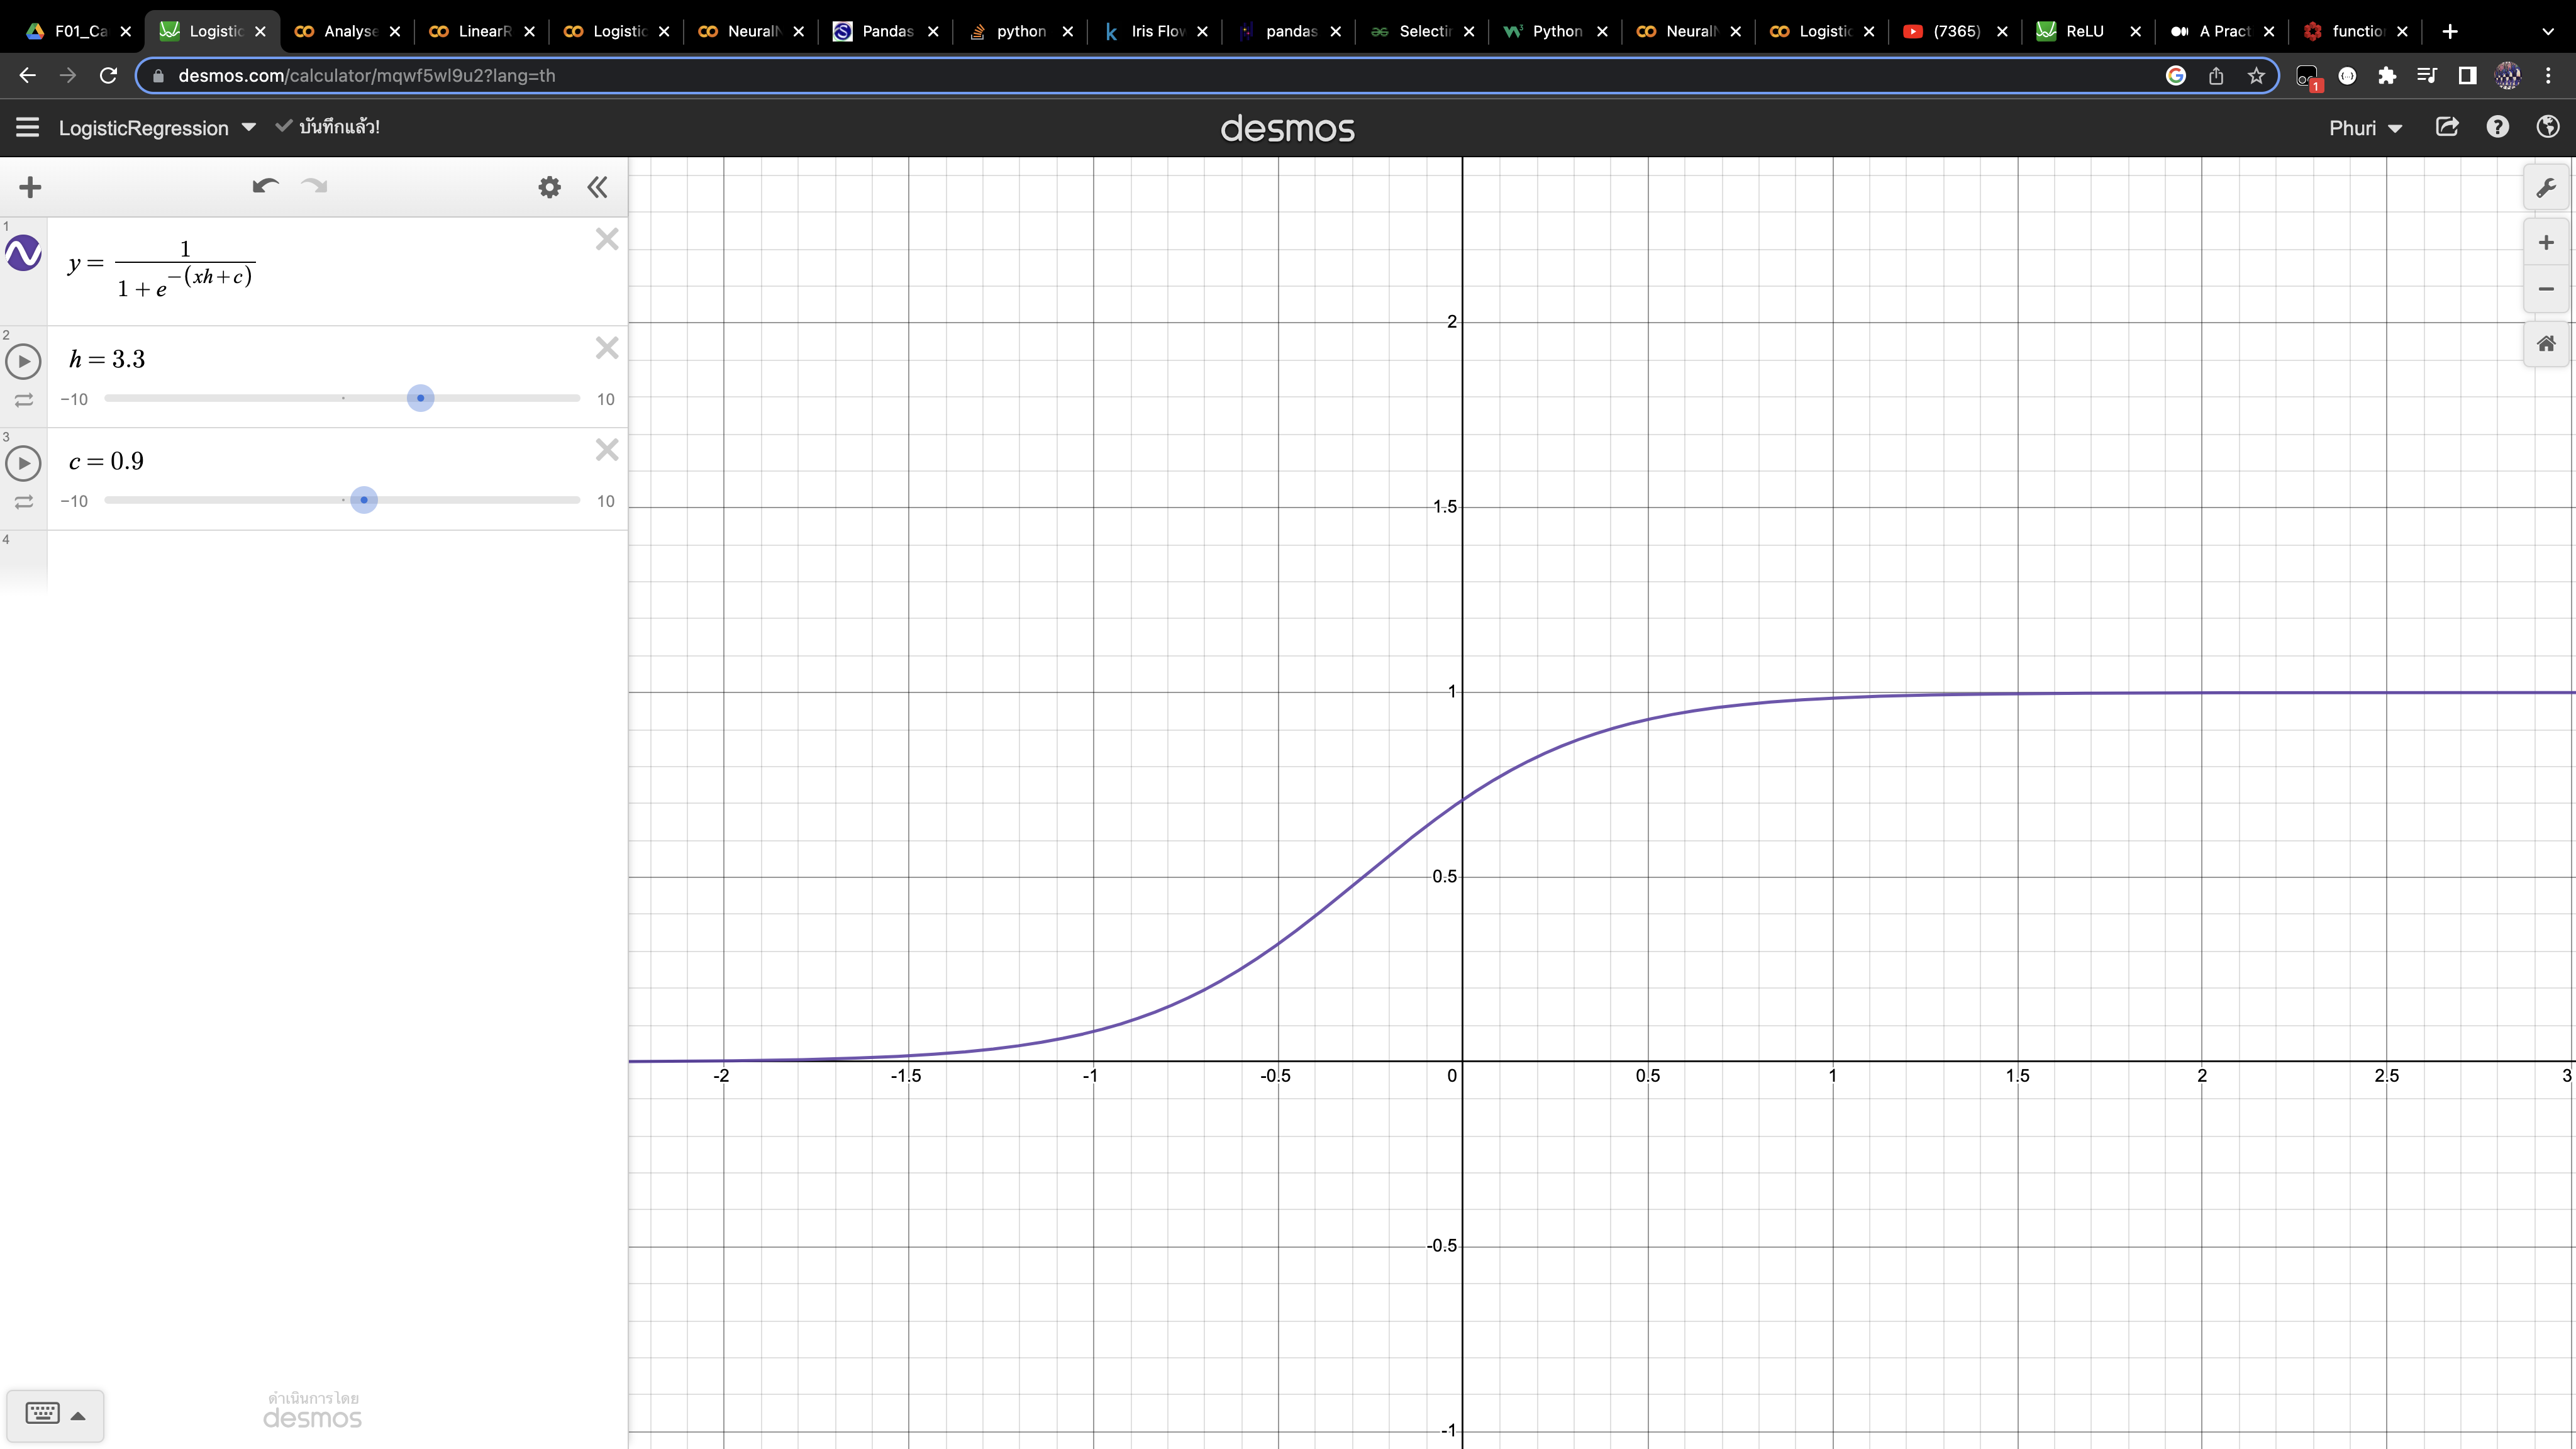

**Q: Why using $e$?**

A: For mathematical simplicity and convenience.
* $e^x=\exp(x)$
* $\frac{d}{dx}[e^x]=e^x$

reference: 
* https://www.quora.com/Why-is-logistic-regression-based-on-the-exponential-function-Where-did-the-exponential-function-come-from-anyway
* https://stats.stackexchange.com/questions/338702/why-do-we-use-the-natural-exponential-in-logistic-regression

###(2.) Creating Evaluation Function (Loss Function)

**Loss Function (Error Function)**

The Loss function is a method of evaluating how well the hypothesis function is modeling the dataset. The lower the loss function, the better the model. (https://www.analyticsvidhya.com/blog/2022/06/understanding-loss-function-in-deep-learning/)

* $J(\vec{w},b)=\frac{1}{m}\sum_{i=1}^m[-y_i\ln(y'_i)-(1-y_i)\ln(1-y'_i)]$
  * $x=$ input of the dataset
  * $y=$ output of the dataset $\in[0,1]$
  * $y'=$ predicted output $\in[0,1]$

Reference: 
* https://developers.google.com/machine-learning/crash-course/logistic-regression/model-training
* https://towardsdatascience.com/optimization-loss-function-under-the-hood-part-ii-d20a239cde11

**Q: Why doing this? $y_i=1\implies\ln(y'_i)$ and $y_i=0\implies\ln(1-y'_i)$**

A: 

According to Logarithm: $a^b=c\implies\log_a(c)=b$

$\therefore a^0=1\implies\log_a(1)=0\implies\lim_{c\to1}\log_a(c)=0$

Given that:
* $h(\vec{x})\in[0,1]$
* $h(\vec{x})\geq0.5\implies y=1\implies \ln(h(\vec{x}))\to0$
* $h(\vec{x})<0.5\implies y=0\implies \ln(1-h(\vec{x}))\to0$

**Q: Why we do not use square error function? Why $J(\vec{w},\vec{b})\neq\frac{1}{2m}\sum_{i=1}^m[y'_i-y_i]^2$?**

A: $\frac{1}{2m}\sum_{i=1}^m[y'_i-y_i]^2$ is not suitable with logistic regression because the value of $y$ is not continueous. If the square error function is ploted on $n$ D cartesian plane. Then, the function will display multiple local minimums, which interrupt gradient descent from finding the global minimum.

**Q: Why $\ln(x)$?**

A: For mathematical simplicity

* $\frac{d}{dx}[\ln(x)]=\frac1x$

###(3.) Create Optimization Function using Gradient Descent

**Gradient descent of logistic repression**

Gradient descent is an optimization algorithm which is used for minimizing error value of the error function

$\vec{w}:=\vec{w}-a*\frac{\partial}{\partial \vec{w}}J_n(\vec{w})$
* $\frac{\partial}{\partial \vec{w}}J_n(\vec{w})=\frac{1}{m}X^T[y_{m}'-y_{m}]$

$b:=b-a*\frac{\partial}{\partial b}J_n(b)$
* $\frac{\partial}{\partial b}J_n(b)=\frac{1}{m}\vec{1}^T[y_{m}'-y_{m}]$

Reference: 
* https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d

In [29]:
'''
This logistic regression model only categorize 'Iris-setosa'
In order to implement multinomial logistic regression, you just have to repleat the binary logistic regression with other Y columns.
'''
#Trai_Y.columns
FlowerIndex=1

In [30]:

def LogisR_Hypo(Coef,Inte,dX):
  return (1)/(1+np.exp(-np.dot(dX,Coef)-Inte))

def Diff_LogisR_Loss(dX,dY,Coef,Inte):
  ix=np.ones(dX.shape[0])
  return [
      (1/dX.shape[0])*np.dot(ix.T,(LogisR_Hypo(Coef,Inte,dX)-dY)),  # Intercept
      (1/dX.shape[0])*np.dot(dX.T,(LogisR_Hypo(Coef,Inte,dX)-dY))   # Coefficient
      ]
  # reference: https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d

def GradientDescent(dX,dY,Diff,LRate=0.009,Decay=0.000_02,LastEpoch=10_000, AcceptError=1e-10):
  epoch=0
  Coef_Vect=np.ones(dX.shape[1])
  Inte_Cons=1
  GD_Growth=[]
  while epoch<LastEpoch or (np.all(np.abs(Diff(dX,dY,Coef_Vect,Inte_Cons)[1])<=AcceptError)and (np.abs(Diff(dX,dY,Coef_Vect,Inte_Cons)[0])<=AcceptError)):
    Coef_Vect-=LRate*pow((1-Decay),epoch)*np.array(Diff(dX,dY,Coef_Vect,Inte_Cons)[1].tolist()).reshape((-1))
    Inte_Cons-=LRate*pow((1-Decay),epoch)*np.array(Diff(dX,dY,Coef_Vect,Inte_Cons)[0].tolist()).reshape((-1))
    row = pd.DataFrame({
              'epoch No.': [epoch], 
              'Error': [np.abs(Diff(dX,dY,Coef_Vect,Inte_Cons)[0])],
              })
    GD_Growth.append(row)

    # Slowly decrease learning rate.
    # reference: https://www.thoughtco.com/exponential-decay-definition-2312215
    epoch+=1
  GD_Growth = pd.concat(GD_Growth)
  # reference: https://stackoverflow.com/questions/28669482/appending-pandas-dataframes-generated-in-a-for-loop
  return [list(Inte_Cons),list(Coef_Vect),GD_Growth]
  # 30 seconds

P_Logis=GradientDescent(Trai_X,Trai_Y.iloc[:,FlowerIndex],Diff_LogisR_Loss)

###(4.) Logistic Regression implementation (with `sklearn`)

In [31]:
from sklearn import linear_model

SK_Logis = linear_model.LogisticRegression()
SK_Logis.fit(Trai_X,Trai_Y.iloc[:,FlowerIndex])

#SK_Logis.coef_[0]
#SK_Logis.intercept_[0]

# This logistic regression model only categorize 'Iris-setosa'

LogisticRegression()

#(2.) Evaluation

###Note

This documentation provide 4 technoques to evaluate the accuracy of 2 logistic regression models which based on this website (https://meettank29067.medium.com/performance-measurement-in-logistic-regression-8c9109b25278) and this video (https://youtu.be/xxFYro8QuXA).
1. AIC
2. Confusion Matrix
3. ROC curve
4. $R^2$ for Logistic Regression

This document is also including the implementation of each techniques.

However, this document does not indicates the pro, cons and limitation of each statistical evaluation technoques. Some techniques might suitable for some other machine learning models and/or some other specific problems and vice versa. I might document other related detail in the future, if it is connect to my future documentation topic.

###(1.) Maximum Likelihood Estimation

**What is estimator**
* a rule, method, or criterion for arriving at an estimate of the value of a parameter.
* an equation for picking the “best,” or most likely accurate parameters based upon observations in realty.
* e.g. mean, variance etc.

**What is Maximum Likelihood Estimation?**
* It is a process of using data to find estimators for different parameters characterizing the model (distribution and other statistical model).

**Maximum Likelihood Estimation Formula**

$L=\hat{h}=\arg\max_{h\in D}\Pi_{i=1}^n P(h,x_i)$
* $\arg\max=$ return a maximum value
* $h=$ a parameter
* $\hat{h}=$ an approximated parameter (estimator)
* $P=$ probability distribution
* $D=$ set of all possible value of a dataset (input)

**Different between Maximum Likelihood Estimation and Loss Function**
* A loss function is a measurement of model misfit as a function of the model parameters. Loss functions are more general than solely MLE.
* MLE is a specific type of probability model estimation, where the loss function is the (log) likelihood.

Reference: https://stats.stackexchange.com/questions/339897/what-is-the-difference-between-loss-function-and-mle

**Reference:**
1. https://www.analyticsvidhya.com/blog/2021/09/maximum-likelihood-estimation-a-comprehensive-guide/
* KL Divergence is the algorithm that is used for comparing 2 probability distributions. The closer KL Divergence to 0, means both probability distributions are more similar to each other.
* Maximum Likelihood estimation is the algorithm that minimize KL Divergence in order to approximate the value of a parameter in probability distribution.
* This website explain how Maximum Likelihood estimation is invented from KL Divergence.
2. https://youtu.be/9_eZHt2qJs4
* This video explain what is KL divergence.
3. https://youtu.be/Dn6b9fCIUpM
* This video explain how to apply derivative of Log likelihood function in order to find means value and standard deviation. 
4. https://arunaddagatla.medium.com/maximum-likelihood-estimation-in-logistic-regression-f86ff1627b67
* This blog explains how maximum likelihood estimation is used in order to invent the loss function of logistic regression.
5. https://meettank29067.medium.com/performance-measurement-in-logistic-regression-8c9109b25278
* This blog explain how maximum likelihood estimation is used in order to measure the accuracy of logistic regression. 

**Implementation**

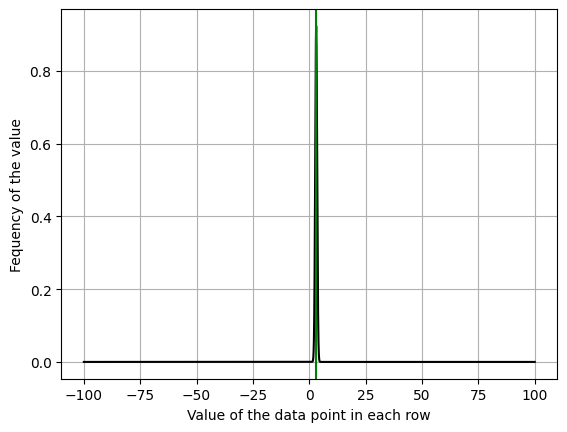

In [ ]:
def StandardDeviation(x):
  ans=0
  for i in x:
    ans+=pow(i-x.mean(),2)
  ans/=x.shape[0]
  ans=math.sqrt(ans)
  return ans

def BellCurve(Data, Domain=np.arange(-100,100,0.01)):
  XLine=Domain
  YLine=(np.exp(-(1/2)*pow((XLine-Data.mean())/StandardDeviation(Data),2)))/(math.sqrt(np.pi*2)*StandardDeviation(Data))
  return [XLine,YLine]

name=Trai_X.columns[1]
fx=BellCurve(df[name])

plt.plot(fx[0],fx[1],color='black')
#plt.axvline(df[name].mean()-0.675*StandardDeviation(df[name]),color='red') # reference: https://stackoverflow.com/questions/24988448/how-to-draw-vertical-lines-on-a-given-plot
plt.axvline(df[name].mean(),color='green')
#plt.axvline(df[name].mean()+0.675*StandardDeviation(df[name]),color='blue') # reference: https://www.statology.org/find-quartiles-with-mean-standard-deviation/
plt.xlabel("Value of the data point in each row")
plt.ylabel("Fequency of the value")
plt.grid()
plt.show()

**Plot Graph**
* Green line = True average value
* Black Line = Normal Distribution function

In [ ]:
import sympy as smp 
#import math
def NormalDistribution(s=1,a=1,x=1):
  # s = Standard deviation
  # x = input
  # a = average value of input data
  return (smp.exp(-(((x-a)/s)**2)/2))/(s*(2*smp.pi)**(1/2))

def MLE(X_Line,P_Function,hh,domain=np.arange(-5,30,0.1)):
  X_Plot=[]
  Y_Plot=[]
  for h in domain:
    value=1
    for i in X_Line:
      value*=P_Function(**{hh:h, 'x':i})
      # reference: https://stackoverflow.com/questions/21986194/how-to-pass-dictionary-items-as-function-arguments-in-python
    Y_Plot.append(smp.log(value))
    X_Plot.append(h)
  return [X_Plot,Y_Plot]

name=Trai_X.columns[1]

S_MLE=MLE(df[name],NormalDistribution,'s')
A_MLE=MLE(df[name],NormalDistribution,'a')

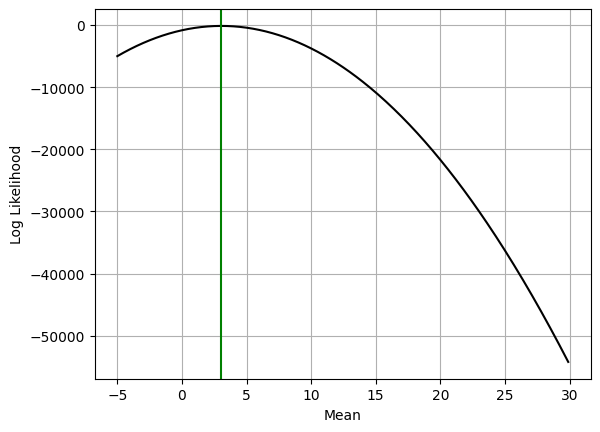

In [ ]:
XLine=np.array(A_MLE[0])
YLine=np.array(A_MLE[1])

plt.plot(XLine,YLine,color='black')

'''
The black line means the accuracy of estimated mean value. 
The greater the function is, the more accurate it is.
'''

plt.axvline(df[name].mean(),color='green') # True mean value
plt.ylabel("Log Likelihood")
plt.xlabel("Mean")
plt.grid()
plt.show()

**Plot Log Likelihood Function of Mean value**
* Green line = True average value
* Black Line = Likelihood Function of average value in Normal Distribution function

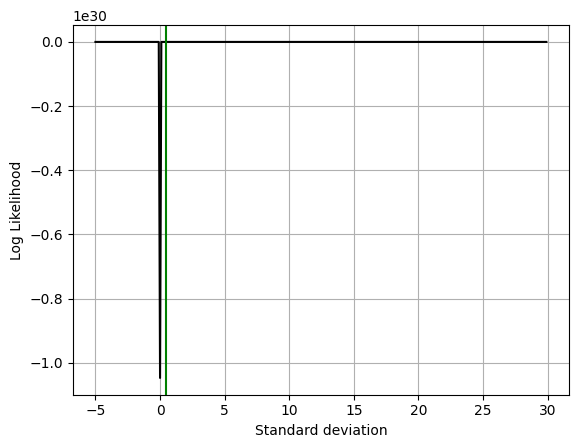

In [ ]:
XLine=np.array(S_MLE[0])
YLine=np.array(S_MLE[1])

plt.plot(XLine,YLine,color='black')

'''
The black line means the accuracy of estimated Standard deviation value. 
The greater the function is, the more accurate it is.
'''

plt.axvline(df[name].std(),color='green') # True Standard deviation
plt.ylabel("Log Likelihood")
plt.xlabel("Standard deviation")
plt.grid()
plt.show()

**Plot Log Likelihood Function of standard deviation value**
* Green line = True standard deviation value
* Black Line = Likelihood Function of standard deviation in Normal Distribution function

###(2.) AIC ( Akaike Information Criteria)

**What is AIC?**
* AIC is the algorithm that compare the accuracy of multiple models.
* If the model has low AIC means model is good. 
* If 2 models have same AIC, than one with fewer parameters is the better model.
* AIC is also used for determine which set of parameters is useful for prediction, by creating multiple models with different set of paramaters, and compare their AIC score.
* AIC is useless when it is used for evaluating one model.

**AIC Formula**
* $A_{AIC}=2p-2\ln(L)$
 * $p=$ the number of independent variables used to build the model.
 * $L=$ the maximum likelihood estimate of the model (how well the model reproduces the data).
 * The best-fit model according to AIC is the one that explains the greatest amount of variation using the fewest possible independent variables.

Note
* Given that: Loss Function $=J=\frac{1}{m}\sum_{i=1}^m[-y_i\ln(y'_i)-(1-y_i)\ln(1-y'_i)]$
* Likelihood $= \Pi_{i=1}^m {y'}_i^{y_i}(1-y'_i)^{1-y_i}$

Given that: 
* $\log_a(xy)=\log_a(x)+\log_a(y)$
* $\log_a(x^y)=y*\log_a(x)=\log_a(x)*y$

$\therefore$ Log Likelihood $=\ln(L)=-mJ$

**Loss Function (Error Function)**

* $J(\vec{w},b)=\frac{1}{m}\sum_{i=1}^m[-y_i\ln(y'_i)-(1-y_i)\ln(1-y'_i)]$
  * $x=$ input of the dataset
  * $y=$ output of the dataset $\in[0,1]$
  * $y'=$ predicted output $\in[0,1]$

In [ ]:
'''
Odd is not probability
Odd = (Happening_Event)/(Not_Happening_Event)
Odd = (True_Events)/(False_Events)

Log_Odd = Log(Odd)
Log = A way to transform [0,oo] to [-oo,oo]

'''

def P_LogOdd(Coef=1,Inte=1,dX=1):
  # LogisR_Hypo 
  # Probability_Calculated_By_LogOdd
  return (1)/(1+np.exp(-np.dot(dX,Coef)-Inte))

def Likelihood_LogOdd(dicct):
  value=1
  for i in range(len(dicct['dX'])):
    Podd=P_LogOdd(Coef=dicct['Coef'],Inte=dicct['Inte'],dX=dicct['dX'].iloc[i,:])
    Yodd=list(dicct['dY'].iloc[[i]])[0]
    value*=(Podd**Yodd)*((1-Podd)**(1-Yodd))
    # reference: https://stackoverflow.com/questions/21986194/how-to-pass-dictionary-items-as-function-arguments-in-python
  return value

def AIC(MLE_Function,P_Input,P_Parameter):
  count = 0
  for i in P_Parameter:
    if isinstance(P_Parameter[i], list):
      count += len(P_Parameter[i])
  # reference: https://www.geeksforgeeks.org/python-count-number-of-items-in-a-dictionary-value-that-is-a-list/
  return 2*(count)-2*math.log(MLE_Function(P_Parameter|P_Input))

SK_AIC=AIC(
    Likelihood_LogOdd,
    {'dX':Test_X,'dY':Test_Y.iloc[:,FlowerIndex]},
    {'Coef':list(SK_Logis.coef_[0]),'Inte':[SK_Logis.intercept_[0]]},
     )

SK_Like=Likelihood_LogOdd(
    {'dX':Test_X,'dY':Test_Y.iloc[:,FlowerIndex]}|
    {'Coef':list(SK_Logis.coef_[0]),'Inte':[SK_Logis.intercept_[0]]},
     )

Pr_AIC=AIC(
    Likelihood_LogOdd,
    {'dX':Test_X,'dY':Test_Y.iloc[:,FlowerIndex]},
    {'Coef':P_Logis[1],'Inte':P_Logis[0]},
     )

Pr_Like=Likelihood_LogOdd(
    {'dX':Test_X,'dY':Test_Y.iloc[:,FlowerIndex]}|
    {'Coef':P_Logis[1],'Inte':P_Logis[0]},
     )
print('The less AIC score, the more accurate the model is.')
print('SK_AIC = '+str(SK_AIC))
print('Pr_AIC = '+str(Pr_AIC)+'\n')
print('The more Likelihood score, the more accurate the model is.')
print('SK_Likelihood = '+str((SK_Like[0])))
print('Pr_Likelihood = '+str((Pr_Like[0]))+'\n')
print('SK_Log_Likelihood = '+str(math.log(SK_Like[0])))
print('Pr_Log_Likelihood = '+str(math.log(Pr_Like[0]))+'\n')

The less AIC score, the more accurate the model is.
SK_AIC = 49.69343348726156
Pr_AIC = 50.21170807176488

The more Likelihood score, the more accurate the model is.
SK_Likelihood = 2.4025942554154818e-09
Pr_Likelihood = 1.854122987167314e-09

SK_Log_Likelihood = -19.84671674363078
Pr_Log_Likelihood = -20.10585403588244



In [ ]:
def LogisR_Hypo(Coef,Inte,dX):
  return (1)/(1+np.exp(-np.dot(dX,Coef)-Inte))

def LogisR_Loss(dX,dY,Coef,Inte):
  m=0
  J=0
  for i in range(dY.shape[0]):
    J+=(dY.iloc[i,FlowerIndex]*math.log(LogisR_Hypo(Coef,Inte,dX.iloc[i,:]))+(1-dY.iloc[i,FlowerIndex])*math.log(1-LogisR_Hypo(Coef,Inte,dX.iloc[i,:])))
  return J
  # reference: https://machinelearningmastery.com/logistic-regression-with-maximum-likelihood-estimation/

def AIC(dX,dY,Coef,Inte):
  return 2*(len(Coef)+1)-2*LogisR_Loss(dX,dY,Coef,Inte)

SK_AIC=AIC(Test_X,Test_Y,SK_Logis.coef_[0],SK_Logis.intercept_[0])
Pr_AIC=AIC(Test_X,Test_Y,P_Logis[1],P_Logis[0])
SK_Like=LogisR_Loss(Test_X,Test_Y,SK_Logis.coef_[0],SK_Logis.intercept_[0])
Pr_Like=LogisR_Loss(Test_X,Test_Y,P_Logis[1],P_Logis[0])

print('The less AIC score, the more accurate the model is.')
print('SK_AIC = '+str(SK_AIC))
print('Pr_AIC = '+str(Pr_AIC)+'\n')
print('The more Likelihood score, the more accurate the model is.')
print('SK_Likelihood = '+str(smp.exp(SK_Like)))
print('Pr_Likelihood = '+str(smp.exp(Pr_Like))+'\n')
print('SK_Log_Likelihood = '+str((SK_Like)))
print('Pr_Log_Likelihood = '+str((Pr_Like))+'\n')

The less AIC score, the more accurate the model is.
SK_AIC = 49.693433487261565
Pr_AIC = 50.21170807176488

The more Likelihood score, the more accurate the model is.
SK_Likelihood = 2.40259425541547e-9
Pr_Likelihood = 1.85412298716731e-9

SK_Log_Likelihood = -19.846716743630783
Pr_Log_Likelihood = -20.10585403588244



###(3.) Confusion matrix

**Note**
* False = The Model predicts the input incorrectly
* True = The Model predicts the input correctly
* The lower the False Positive and False negative, the more accurate the model is.

In [63]:
def LogisR_Hypo(Coef,Inte,dX):
  return (1)/(1+np.exp(-np.dot(dX,Coef)-Inte))

def ConfusionMatrix(Hypo,Coef,Inte,dX,dY,Threshold=0.5):
  TP=0
  FP=0
  TN=0
  FN=0
  Predictt=Hypo(Coef,Inte,dX)
  for i in range(len(dY)):
    if (Predictt[i]>=Threshold and dY.iloc[i]==1):
      TP+=1
    elif (Predictt[i]>=Threshold and dY.iloc[i]==0):
      FP+=1
    elif (Predictt[i]<Threshold and dY.iloc[i]==0):
      TN+=1
    elif (Predictt[i]<Threshold and dY.iloc[i]==1):
      FN+=1
  #Confusion = pd.DataFrame({'Actual_Positive':[TP,FN],'Actual_Negative':[FP,TN]},index=['Predict_Positive', 'Predict_Negative'])
  Confusion = pd.DataFrame({'Predict_Negative':[TN,FN],'Predict_Positive':[FP,TP]},index=['Actual_Negative', 'Actual_Positive'])
  return [Confusion,[TP,FP,TN,FN]]

In [64]:
ConfusionMatrix(LogisR_Hypo,SK_Logis.coef_[0],SK_Logis.intercept_[0],Test_X,Test_Y.iloc[:,FlowerIndex],Threshold=0.5)[0]

,Predict_Negative,Predict_Positive
Actual_Negative,23,1
Actual_Positive,10,4


In [65]:
ConfusionMatrix(LogisR_Hypo,P_Logis[1],P_Logis[0],Test_X,Test_Y.iloc[:,FlowerIndex],Threshold=0.5)[0]

,Predict_Negative,Predict_Positive
Actual_Negative,22,2
Actual_Positive,11,3


**Result**

According to confusuion matrix when threshold=0.5, my implementation is better than SK Learn implementation.

**Confusion Matrix in SKLearn**
* SKLearn can also compute Confusion Matrix with multiple classification
* SKLearn can also compute Confusion Matrix with data other than 0 and 1.

In [66]:
from sklearn.metrics import confusion_matrix

print('\nbinary classification confusion matrix')
print('[[true_n, false_p,]')
print('[false_n, true_p]]')
SK_Predict=SK_Logis.predict(Test_X)

print('\nSK_Predict')
print(confusion_matrix(Test_Y.iloc[:,FlowerIndex], SK_Predict))

def LogisR_Hypo(Coef,Inte,dX):
  return (1)/(1+np.exp(-np.dot(dX,Coef)-Inte))

Pr_Predict=[]
Threshold=0.5

for i in LogisR_Hypo(P_Logis[1],P_Logis[0],Test_X):
  if i>=Threshold:
    Pr_Predict.append(1)
  else:
    Pr_Predict.append(0)

print('\nPr_Predict')
print(confusion_matrix(Test_Y.iloc[:,FlowerIndex], np.array(Pr_Predict)))
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


binary classification confusion matrix
[[true_n, false_p,]
[false_n, true_p]]

SK_Predict
[[23  1]
 [10  4]]

Pr_Predict
[[22  2]
 [11  3]]


###(4.) ROC curve (receiver operating characteristic curve)

In [67]:
def ROC(Hypo,Coef,Inte,dX,dY,iteration=200):
  Thresholds = np.linspace(0, 1, iteration)
  # In this case, tn=0, 
  # therefore when np.linspace(0, 1, iteration), fpr = 1
  Set_X=[]
  Set_Y=[]
  Set_Z=[]
  for i in Thresholds:
    Catrix=ConfusionMatrix(Hypo,Coef,Inte,dX,dY,Threshold=i)
    
    # False = The Model predicts the input incorrectly
    # True = The Model predicts the input correctly
    # [TP,FP,TN,FN]
    tp=Catrix[1][0] # True Positive
    fp=Catrix[1][1] # False Positive
    tn=Catrix[1][2] # True Negative
    fn=Catrix[1][3] # False Negative

    # If the variable devined by 0, there will be an error.
    # If (tp+fn) = 0, means tp = 0, therefore tpr = 0
    try:
      fpr=fp/(fp+tn)  # False Positive Rate
    except:
      fpr=0
    try:
      tpr=tp/(tp+fn)  # True Positive Rate
    except:
      tpr=0   

    # Sometimes, percision is used instead of false positive rate.
    # It is a good idea to use this algorithm when the data is imbalance,
    # such as when predict whatever the patients have rare disease.
    # reference: https://youtu.be/4jRBRDbJemM
    #try:
    #  percision=tp/(tp+fp)
    #except:
    #  percision=0
    #Set_X.append(percision)

    Set_X.append(fpr)
    Set_Y.append(tpr)
    Set_Z.append(i)
  return [Set_X,Set_Y,Set_Z]

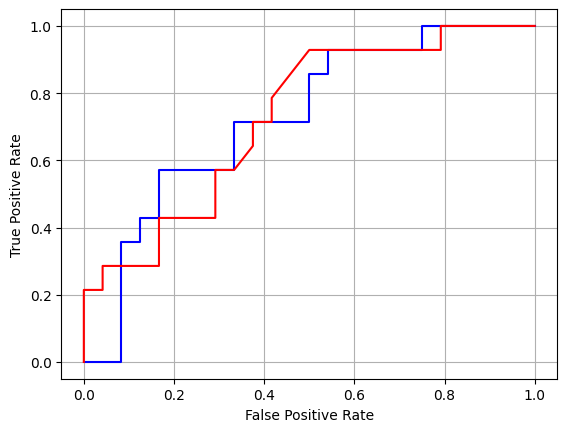

In [68]:
Pr_ROC=ROC(LogisR_Hypo,P_Logis[1],P_Logis[0],Test_X,Test_Y.iloc[:,FlowerIndex])
SK_ROC=ROC(LogisR_Hypo,SK_Logis.coef_[0],SK_Logis.intercept_[0],Test_X,Test_Y.iloc[:,FlowerIndex])

plt.plot(Pr_ROC[0],Pr_ROC[1],color='blue')
plt.plot(SK_ROC[0],SK_ROC[1],color='red')

#plt.scatter(Pr_ROC[0],Pr_ROC[1],color='blue')
#plt.scatter(SK_ROC[0],SK_ROC[1],color='red')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.show()

**About This graph**

False means that the Model predicts the input incorrectly. On the other hands, True means the opposite. Therefore the lower False positive rate (left) and the higher True positive rate (up), the better the model is.

When the True positive rate of both models equal to 0.3, the blue model predicts testing data better than the red model.

Another ways to compare both models is to measure the area under the curve (AUC). the larger the area is, the better the model because it means that the model always predict True positive rate correct in any Classification Threshold.

In [70]:
from sklearn.metrics import auc

Pr_AUC = auc(Pr_ROC[0],Pr_ROC[1])
SK_AUC = auc(SK_ROC[0],SK_ROC[1])

print("Pr_AUC =", Pr_AUC)
print("SK_AUC =", SK_AUC)

# reference: https://stackoverflow.com/questions/13320262/calculating-the-area-under-a-curve-given-a-set-of-coordinates-without-knowing-t

Pr_AUC = 0.7261904761904763
SK_AUC = 0.7276785714285714


###(5.) $R^2$ for Logistic Regression

**What is $R^2$?**

$R^2$ is the value that measures how well the model predicts the data.

**Formula**
* $R^2=1-\frac{\ln(L)}{\ln(N)}\in[0,1]$
 * $\ln(L)=-mJ=$ Log of Proposed Model = Log Likelihood 
 * $N=\frac{D^1}{D}=$ Null Model
 * $D^1=$ number of all data points with positive value
 * $D=$ number of all data points

**Keyword**
1. A Saturated Model = A model where the number of parameters/coefficients is equal to the number of data points. This is like a ‘connect the dots’ model
2. A Null Model = A model that is the opposite with only one parameter, which is the intercept.
3. The Proposed Model = A model that is considered the best fit and has a number of parameters in-between the Null and Saturated Models.

Reference
1. https://youtu.be/xxFYro8QuXA
* This video explains how to calculate $R^2$ and $p$ value of logistic regression
2. https://youtu.be/9T0wlKdew6I
* This video explains what is Saturated Models, Deviance, and other details that also related to $R^2$ that are outside the scope of this documents.

In [46]:
Test_Y.iloc[:,FlowerIndex].value_counts()

0.0    24
1.0    14
Name: Iris-versicolor, dtype: int64

In [47]:
Null=14/24
print(Null)

0.5833333333333334


In [61]:
def P_LogOdd(Coef=1,Inte=1,dX=1):
  # LogisR_Hypo 
  # Probability_Calculated_By_LogOdd
  return (1)/(1+np.exp(-np.dot(dX,Coef)-Inte))

def Likelihood_LogOdd(dicct):
  value=1
  for i in range(len(dicct['dX'])):
    Podd=P_LogOdd(Coef=dicct['Coef'],Inte=dicct['Inte'],dX=dicct['dX'].iloc[i,:])
    Yodd=list(dicct['dY'].iloc[[i]])[0]
    value*=(Podd**Yodd)*((1-Podd)**(1-Yodd))
    # reference: https://stackoverflow.com/questions/21986194/how-to-pass-dictionary-items-as-function-arguments-in-python
  return value

SK_Like=Likelihood_LogOdd(
    {'dX':Test_X,'dY':Test_Y.iloc[:,FlowerIndex]}|
    {'Coef':list(SK_Logis.coef_[0]),'Inte':[SK_Logis.intercept_[0]]},
     )

Pr_Like=Likelihood_LogOdd(
    {'dX':Test_X,'dY':Test_Y.iloc[:,FlowerIndex]}|
    {'Coef':P_Logis[1],'Inte':P_Logis[0]},
     )


print('The more Likelihood score, the more accurate the model is.')
print('SK_Likelihood = '+str((SK_Like[0])))
print('Pr_Likelihood = '+str((Pr_Like[0]))+'\n')
print('SK_Log_Likelihood = '+str(math.log(SK_Like[0])))
print('Pr_Log_Likelihood = '+str(math.log(Pr_Like[0]))+'\n')
print('The more R^2, the more accurate the model is. However the value of R^2 is in between [0,1]')
print('SK_R2 = '+str(1-(SK_Like[0])/(Null)))
print('Pr_R2 = '+str(1-(Pr_Like[0])/(Null))+'\n')

The more Likelihood score, the more accurate the model is.
SK_Likelihood = 4.3264185979020645e-10
Pr_Likelihood = 1.773252817228243e-10

SK_Log_Likelihood = -21.561110843821766
Pr_Log_Likelihood = -22.45303532010446

The more R^2, the more accurate the model is. However the value of R^2 is in between [0,1]
SK_R2 = 0.9999999992583283
Pr_R2 = 0.9999999996960138



In [57]:
def LogisR_Hypo(Coef,Inte,dX):
  return (1)/(1+np.exp(-np.dot(dX,Coef)-Inte))

def LogisR_Loss(dX,dY,Coef,Inte):
  m=0
  J=0
  for i in range(dY.shape[0]):
    J+=(dY.iloc[i,FlowerIndex]*math.log(LogisR_Hypo(Coef,Inte,dX.iloc[i,:]))+(1-dY.iloc[i,FlowerIndex])*math.log(1-LogisR_Hypo(Coef,Inte,dX.iloc[i,:])))
  return J
  # reference: https://machinelearningmastery.com/logistic-regression-with-maximum-likelihood-estimation/

SK_Like=LogisR_Loss(Test_X,Test_Y,SK_Logis.coef_[0],SK_Logis.intercept_[0])
Pr_Like=LogisR_Loss(Test_X,Test_Y,P_Logis[1],P_Logis[0])

print('The more Likelihood score, the more accurate the model is.')
print('SK_Likelihood = '+str(smp.exp(SK_Like)))
print('Pr_Likelihood = '+str(smp.exp(Pr_Like))+'\n')
print('SK_Log_Likelihood = '+str((SK_Like)))
print('Pr_Log_Likelihood = '+str((Pr_Like))+'\n')
print('The more R^2, the more accurate the model is. However the value of R^2 is in between [0,1]')
print('SK_R2 = '+str(1-smp.exp(SK_Like)/(Null)))
print('Pr_R2 = '+str(1-smp.exp(Pr_Like)/(Null))+'\n')

The more Likelihood score, the more accurate the model is.
SK_Likelihood = 4.32641859790210e-10
Pr_Likelihood = 1.77325281722824e-10

SK_Log_Likelihood = -21.56111084382176
Pr_Log_Likelihood = -22.45303532010446

The more R^2, the more accurate the model is. However the value of R^2 is in between [0,1]
SK_R2 = 0.999999999258328
Pr_R2 = 0.999999999696014



#(3.) Plotting Graph

###(1.) Ploting the accual and predicted value

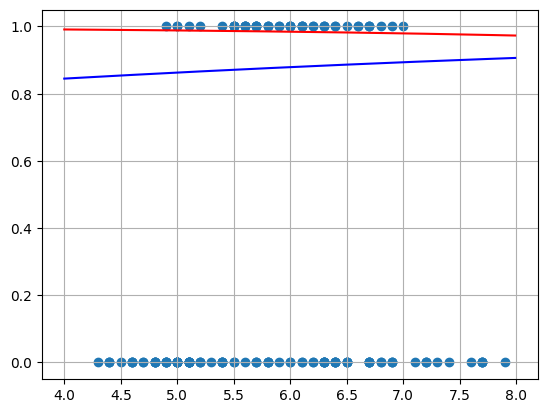

In [ ]:
def HypothesisFunction(x1,h0,h1):
  return 1/(1+np.exp(-(x1*h1+h0)))

# 1/(1+np.exp(-(xline*2-3)))

def EvaluationFunction(data,ind_x,ind_y,h0=0,h1=0):
  num=0
  for i in range(data.shape[0]):
    num-=data.iat[i,ind_y]*np.emath.log(HypothesisFunction(data.iat[i,ind_x],h0,h1))+(1-data.iat[i,ind_y])*np.emath.log(1-HypothesisFunction(data.iat[i,ind_x],h0,h1))
  num*=(1/data.shape[0])
  return num

# Here is the data.
# How do I enforce a square grid in matplotlib? reference: https://stackoverflow.com/questions/50158333/how-do-i-enforce-a-square-grid-in-matplotlib
plt.grid()

# Add labels to the x- and y-axis.
#plt.xlabel(ColX)
#plt.ylabel(ColY)

# Data is plotted.
plt.scatter(df[Trai_X.columns[0]], df[Trai_Y.columns[FlowerIndex]])

# Here is the hypothesis function a.k.a. prediction function.
xline = np.arange(4, 8,0.01)
yline01 = HypothesisFunction(xline,P_Logis[0],P_Logis[1][0])
yline02 = HypothesisFunction(xline,SK_Logis.intercept_[0],SK_Logis.coef_[0][0])
plt.plot(xline, yline01, color='blue')
plt.plot(xline, yline02, color='red')

plt.show()

#print(EvaluationFunction(df,0,1,h0=Hi[0],h1=Hi[1]))

**About this graph**

This graph indicates how 2 logistic regression predict the relationship between input and output data, compare to the accual data.

###(2.) Ploting bias (x), weight (y) and the Loss function (z)

<ipython-input-82-7cd2969bdb05>:34: RuntimeWarning: invalid value encountered in multiply
  num-=(1-dY[i])*np.emath.log(1-HypothesisFunction(dX.iloc[i,X_Index],h0,h1))
<ipython-input-82-7cd2969bdb05>:12: RuntimeWarning: invalid value encountered in multiply
  num-=dY[i]*np.emath.log(HypothesisFunction(dX.iloc[i,X_Index],h0,h1))+(1-dY[i])*np.emath.log(1-HypothesisFunction(dX.iloc[i,X_Index],h0,h1))


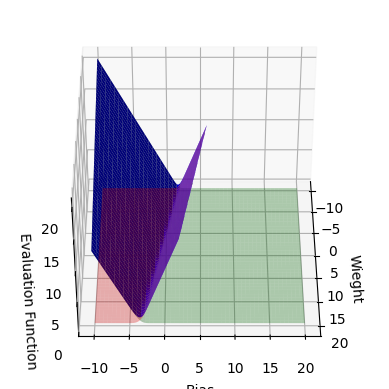

In [ ]:
import math
from mpl_toolkits import mplot3d
from matplotlib.pyplot import figure

def HypothesisFunction(x1,h0,h1):
  return 1/(1+np.exp(-(x1*h1+h0)))

def EvaluationFunction(dX,dY,h0=0,h1=0,X_Index=0):
  num=0
  for i in range(dX.shape[0]):
    try:
      num-=dY[i]*np.emath.log(HypothesisFunction(dX.iloc[i,X_Index],h0,h1))+(1-dY[i])*np.emath.log(1-HypothesisFunction(dX.iloc[i,X_Index],h0,h1))
    except:
      continue
  
  num*=(1/dX.shape[0])
  return num

def EvaluationFunction01(dX,dY,h0=0,h1=0,X_Index=0):
  num=0
  for i in range(dX.shape[0]):
    try:
      num-=dY[i]*np.emath.log(HypothesisFunction(dX.iloc[i,X_Index],h0,h1))
    except:
      continue
  
  num*=(1/dX.shape[0])
  return num

def EvaluationFunction02(dX,dY,h0=0,h1=0,X_Index=0):
  num=0
  for i in range(dX.shape[0]):
    try:
      num-=(1-dY[i])*np.emath.log(1-HypothesisFunction(dX.iloc[i,X_Index],h0,h1))
    except:
      continue
  
  num*=(1/dX.shape[0])
  return num
  # reference: https://www.analyticsvidhya.com/blog/2020/11/binary-cross-entropy-aka-log-loss-the-cost-function-used-in-logistic-regression/

'''
# This is the evaluation function of linear regression
def LineR_Evaluation_1f(data,ind_x,ind_y,h0=0,h1=0):#m,c):
    # size of training data = dfM.shape[0]
    # x_i = dfM.iat[i,0]
    # y_i = dfM.iat[i,1]
    sigma =0
    for i in range(data.shape[0]):
      sigma +=pow((data.iat[i,ind_x]*h0+h1-data.iat[i,ind_y]),2)
    return (1/(2*data.shape[0]))*sigma'''

N = 300
M = 300

x_values = np.linspace(-10, 20, N)
y_values = np.linspace(-10, 20, M)

X, Y = np.meshgrid(x_values, y_values)
Z01 = EvaluationFunction01(Trai_X,Trai_Y.iloc[:,FlowerIndex],h0=X,h1=Y)
Z02 = EvaluationFunction02(Trai_X,Trai_Y.iloc[:,FlowerIndex],h0=X,h1=Y)
Z = EvaluationFunction(Trai_X,Trai_Y.iloc[:,FlowerIndex],h0=X,h1=Y)

# Plotting 3D Data.
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z,color='blue');
ax.plot_surface(X,Y,Z01,alpha=.3,color='green');
ax.plot_surface(X,Y,Z02,alpha=.3,color='red');

ax.set_xlabel('Wieght')
ax.set_ylabel('Bias')
ax.set_zlabel('Evaluation Function')
ax.view_init(40,0);


**About this graph**

* $h=h(x,w,b)=\frac{1}{1+\exp(-wx-b)}$
* The Green graph $=\ln(h)$
* The Red graph $=\ln(1-h)$
* The blue graph $=\ln(h)+\ln(1-h)$

The lower the areas of the blue graph, means the lower the value of loss function (the better the model is).

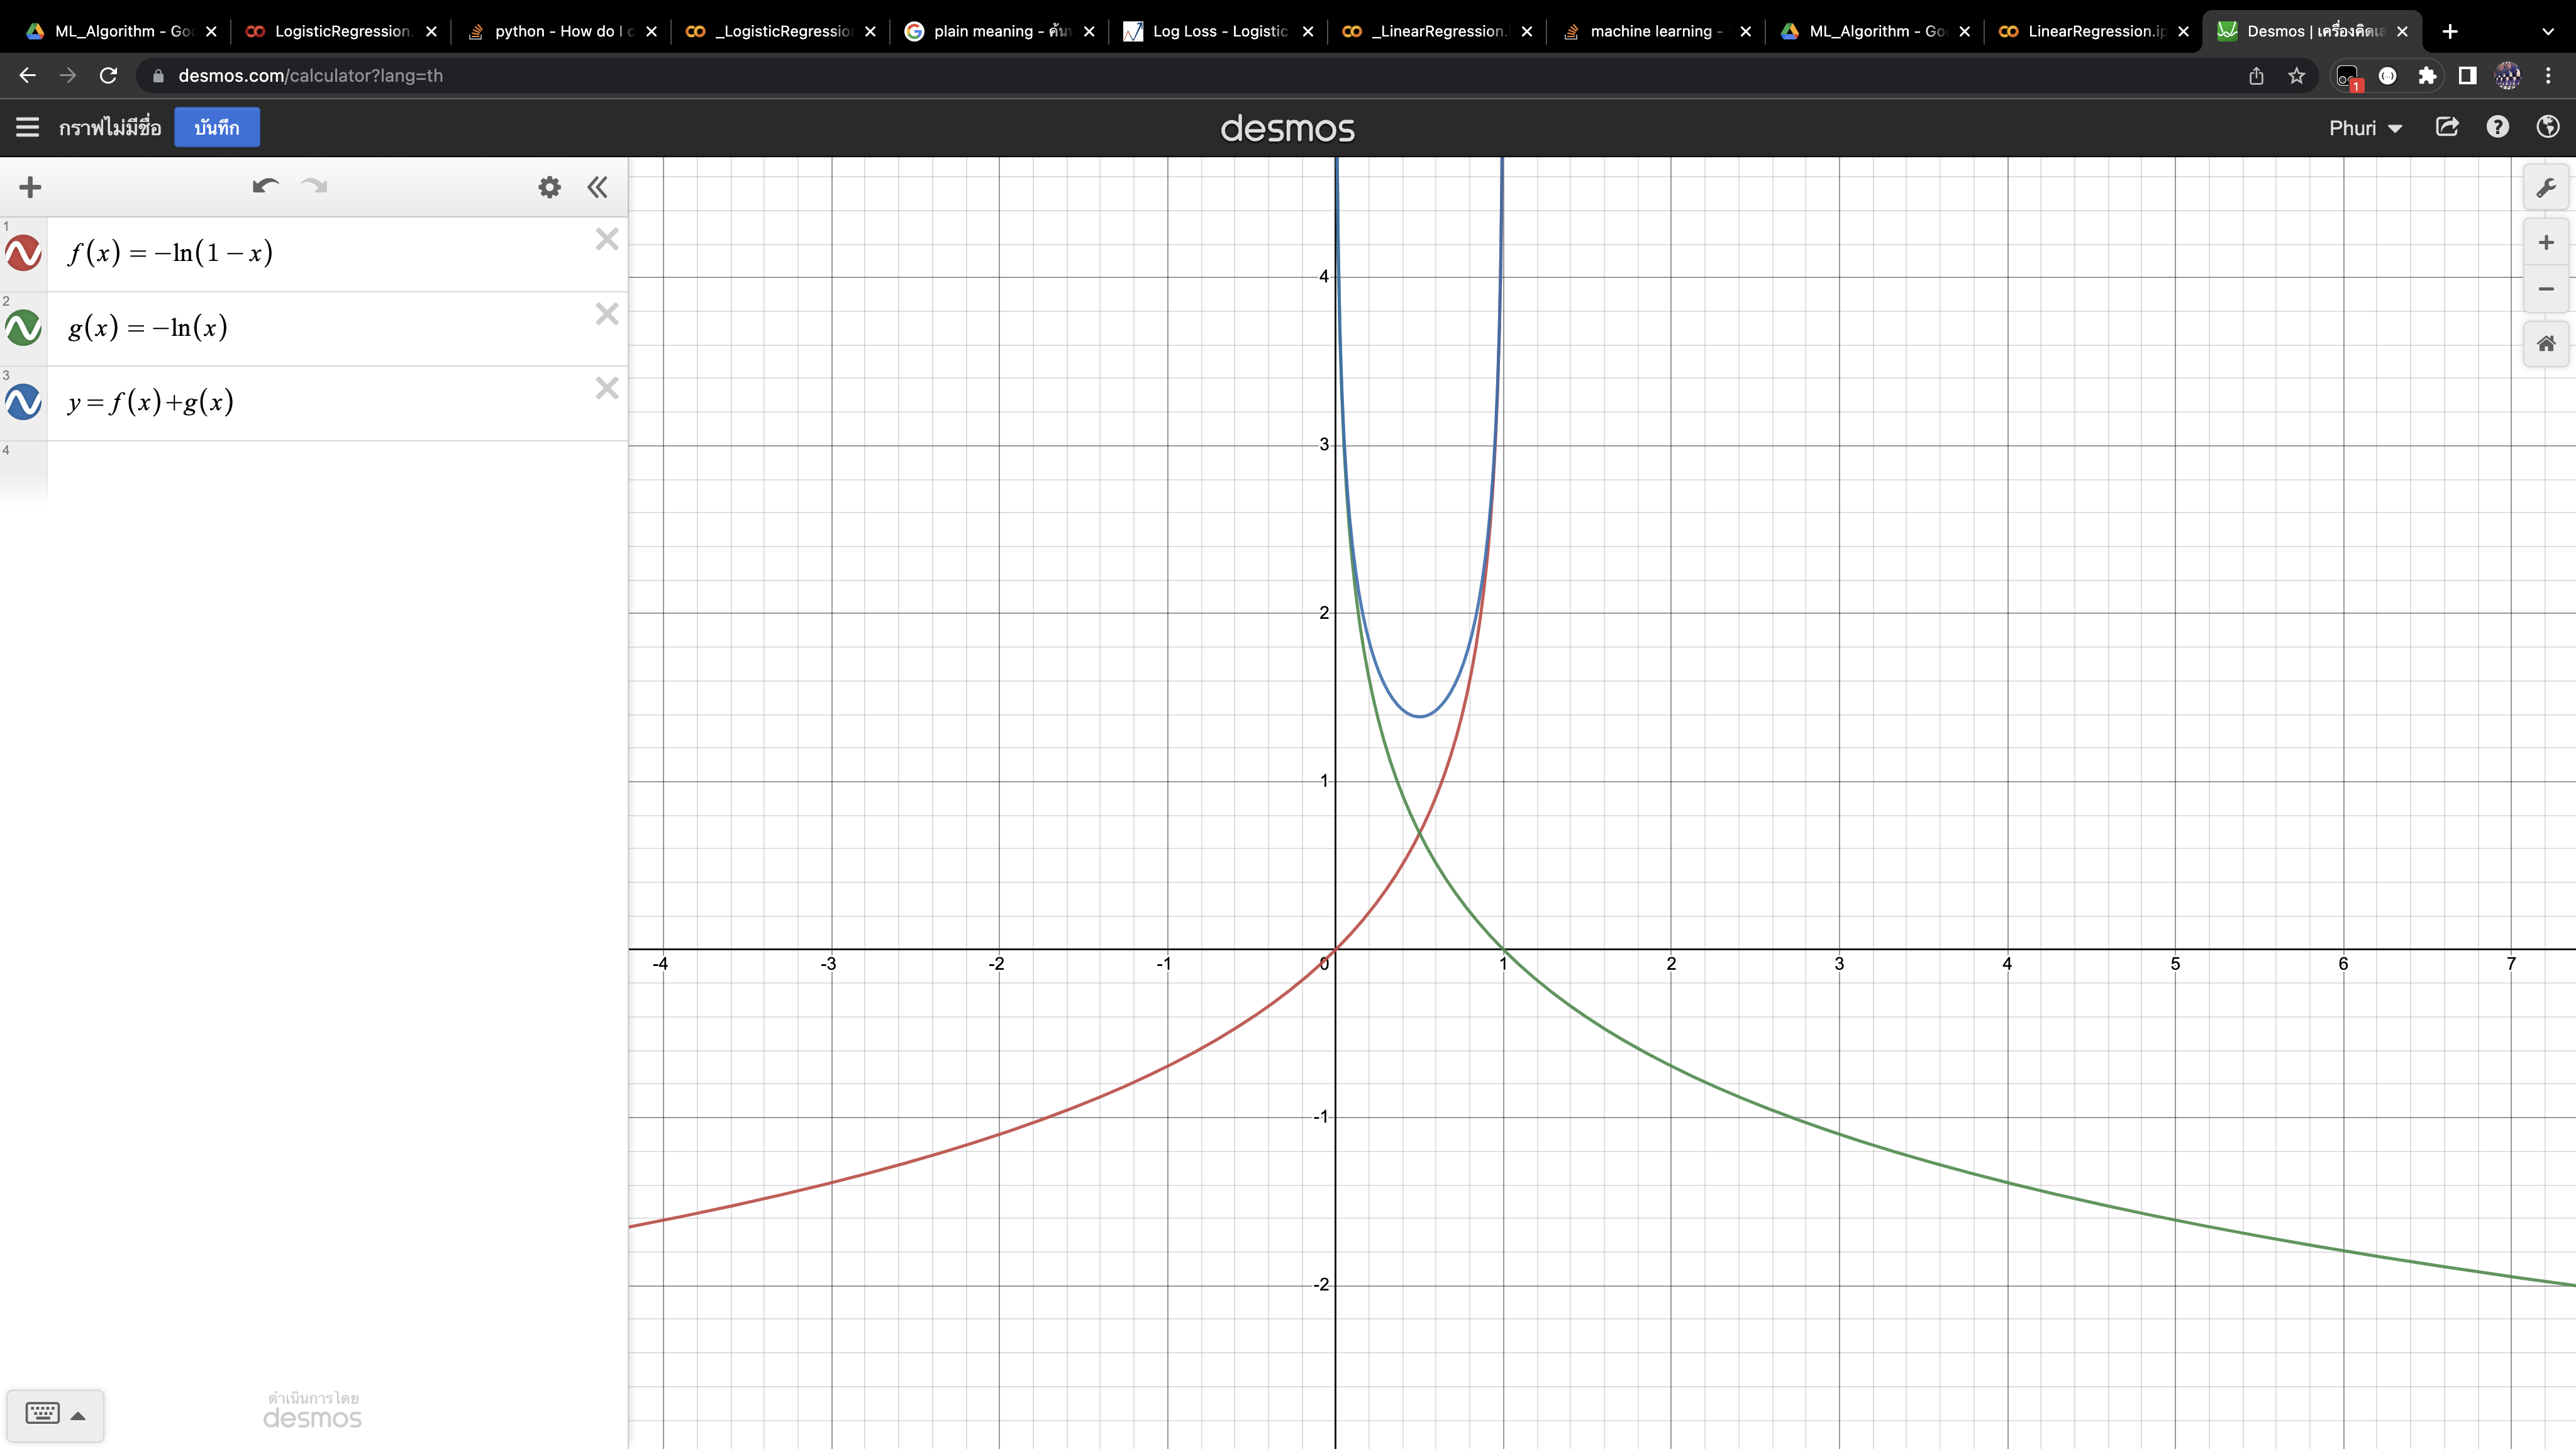

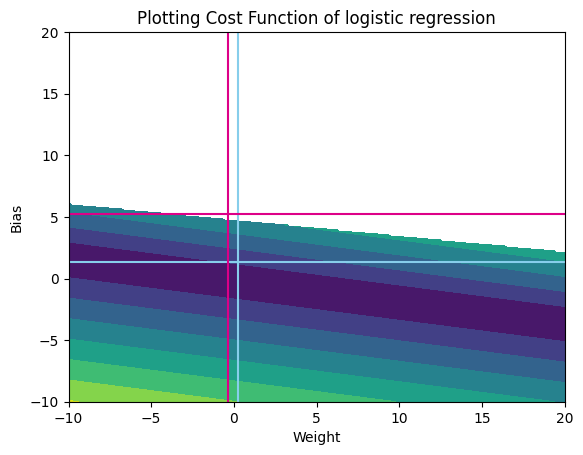

In [ ]:
fig, ax = plt.subplots(1, 1)
  
#ax.contourf(X, Y, Z01,alpha=.5,cmap='Greens')
#ax.contourf(X, Y, Z02,alpha=.5,cmap='Reds')
#ax.contourf(X, Y, Z,alpha=0.5,cmap='Blues')
ax.contourf(X, Y, Z)
# reference: https://stackoverflow.com/questions/57525830/how-do-i-combine-multiple-contour-plots
ax.axvline(P_Logis[1][0],color='skyblue')
ax.axhline(P_Logis[0][0],color='skyblue')
ax.axvline(SK_Logis.coef_[0][0],color='#DD0088')
ax.axhline(SK_Logis.intercept_[0],color='#DD0088')

ax.set_title('Plotting Cost Function of logistic regression')
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
  
plt.show()
# reference: https://www.geeksforgeeks.org/contour-plot-using-matplotlib-python/

**About this graph**

The darker the areas of the graph (the previous 3D blue graph), means the lower the value of loss function (the better the model is). It is noteworthly that the weight approach the darker area. However the bias do not always approaches darker area because it have to "consider" the other weight element in the weight vector.

###(3.) Ploting the epochs and Loss function (y) 

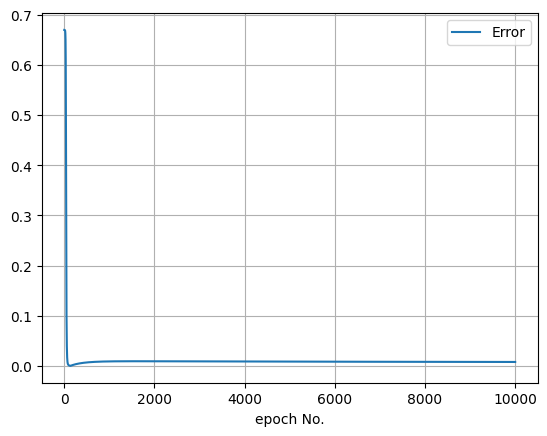

In [ ]:
P_Logis[2].plot(x='epoch No.',y='Error')
plt.grid()
plt.show()